<a href="https://colab.research.google.com/github/bkisken/MLB-Performance-Measures/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bkisken.github.io/MLB-Performance-Measures/


Group Members: Andrew Zimmerman, Brian Kisken

# **MLB Increase in Performance Over the Years**

**Collaboration Plan**

1. **Collaboration Tools**:
   - **GitHub**: We set up a private GitHub repository to coordinate and manage our code. All project files are stored here to ensure version control and collaboration.
   - We also have a shared google drive folder that contains notes and datasets, as well as a place for us to write down potential ideas for our project
  
   
2. **Meeting Schedule**:
   - We will meet weekly to discuss progress, tasks, review the code, and plan our next steps.
  

3. **Work Coordination**:
   - Tasks will be clearly divided between the two of us based on individual strengths

This plan helps us make sure both of us are involved in all aspects of the project.

**Project Goal:**
Our goal with this project is to explore how the performance of MLB players has evolved over the years. Specifically, we’ll look into how metrics like average pitch speed, hit velocity, and base-running speed have changed over time. We want to understand whether MLB players have consistently gotten faster and stronger, and if so, what might have driven these changes. We want to figure out if these changes are driven by certain factors and what impact they’ve had on the way the game is played today.

**Research Question:**
Our main research question is: How has the performance of MLB players evolved over the years in terms of pitch speed, hit velocity, and base-running speed? We’ll also look at what factors could explain these changes. Are players getting faster and stronger due to improvements in training, technology, or other influences in the sport?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import os

pd.options.mode.copy_on_write = True
np.random.seed(1)

In [3]:
from google.colab import drive
!git clone https://github.com/bkisken/MLB-Performance-Measures
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"






Cloning into 'MLB-Performance-Measures'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 77 (delta 29), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 459.62 KiB | 6.96 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [4]:
!ls

'Copy of 03_Classification_2.ipynb'  'Copy of Lab09.ipynb'
'Copy of 05_Classification_1.ipynb'  'Copy of Lab10.ipynb'
'Copy of Demo-01.ipynb'		     'Copy of Milestone1.ipynb'
'Copy of Lab01.ipynb'		     'Copy of P2 (1).ipynb'
'Copy of Lab02.ipynb'		     'Copy of P2.ipynb'
'Copy of Lab04.ipynb'		     'Kisken of P1.ipynb'
'Copy of Lab05.ipynb'		      MLB-Performance-Measures
'Copy of Lab06.ipynb'		      Untitled
'Copy of Lab07.ipynb'


In [5]:
#%%shell
!jupyter nbconvert --to html "Milestone1.ipynb"
#!ls



[NbConvertApp] WARNING | pattern 'Milestone1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    

In [6]:
%cd MLB-Performance-Measures
!ls



/content/drive/MyDrive/Colab Notebooks/MLB-Performance-Measures
MLB-Performance-Measures  pitch_arsenals.csv  README.md


In [7]:
pitches_df = pd.read_csv('pitch_arsenals.csv')
pitches_df.head()

,"last_name, first_name",pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed,st_avg_speed,sv_avg_speed
0,"Burnes, Corbin",669203,96.4,96.3,95.0,88.2,90.3,81.7,NaN,NaN,NaN,NaN
1,"Cole, Gerrit",543037,97.8,98.6,92.0,88.7,89.7,83.0,NaN,NaN,NaN,NaN
2,"Alcantara, Sandy",645261,98.0,97.8,NaN,90.0,91.8,86.2,NaN,NaN,NaN,NaN
3,"Mikolas, Miles",571945,93.5,92.9,NaN,87.7,82.6,76.0,NaN,NaN,NaN,NaN
4,"Wainwright, Adam",425794,88.0,88.6,84.3,75.3,82.2,72.8,NaN,NaN,NaN,NaN


# **Description of Dataset(s) and How the Dataset Can Be Used to Answer the Question:**
The datasets contain detailed baseball performance metrics across 2017-2024, specifically focusing on pitch statistics and batter statistics. The key components of the dataset are:

Pitching Data: This includes yearly statistics on various pitch types, such as fastballs and changeups, across multiple years (2017-2024). For each year, the dataset contains metrics like:
Fastball Average Speed (ff_avg_speed): This represents the average speed of fastballs thrown by pitchers during the season.
Changeup Average Speed (ch_avg_speed): This shows the average speed of changeups thrown by pitchers during the season.

# **How the Dataset Can Be Used to Answer the Question**
The question we aim to answer is how various aspects of pitching and batting performance have changed over time.

Trends in Pitch Speed: The pitching dataset allows us to examine how the median speed of different pitches has evolved over the years. We can analyze whether pitchers are throwing faster or slower pitches over time. This can provide insights into the changing dynamics of pitching strategies or improvements in player training and technology.

By aggregating the data by year and performing statistical analyses, we can generate meaningful insights into how both pitching and batting metrics have changed over time, providing a clearer picture of the trends in baseball performance. This information is valuable for understanding how the game has evolved, how training or technology may have influenced performance, and whether there are any correlations between changes in pitch or exit velocity and overall game outcomes.


# **Analysis of Fastball pitch speeds 2017-2024**
Description of data: The Plot displays the pitch speed change over the years we have available in the data, helping to visualize the data.


[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

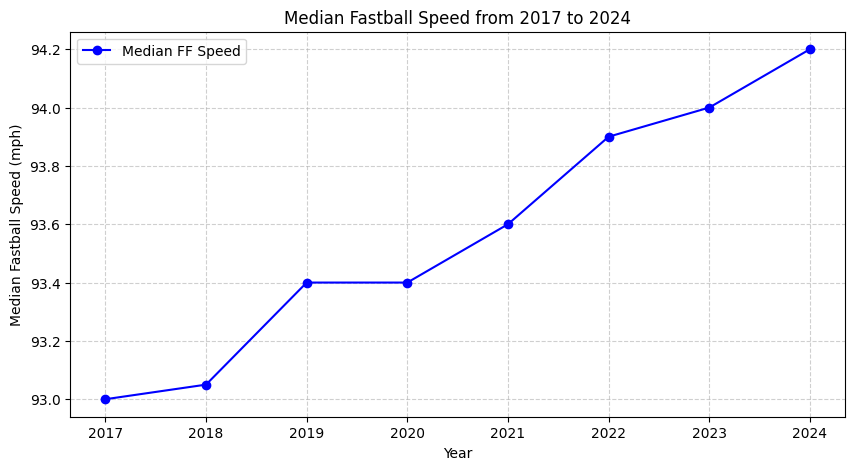

,Year,Median_FF_Speed,Std_FF_Speed,IQR_FF_Speed
0,2017,93.00,2.640768,3.300
1,2018,93.05,2.507578,3.400
2,2019,93.40,2.469834,3.050
3,2020,93.40,2.559964,3.025
4,2021,93.60,2.439391,2.900
5,2022,93.90,2.472252,3.100
6,2023,94.00,2.428745,3.100
7,2024,94.20,2.400042,3.200


In [20]:
#Directory containing the CSV files
repo_path = '/content/MLB-Performance-Measures'

file_names = ["pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
              "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
              "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"]

file_paths = file_names  # Assign file_names to file_paths

stats_dict = {
    'Year': [],
    'Median_FF_Speed': [], 'Std_FF_Speed': [], 'IQR_FF_Speed': []
}

# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)

    # Extract year from filename, handling cases with and without spaces
    if len(file_path.split()) > 1: # if there is a space in the filename
        year = file_path.split()[1].split('.')[0]  # Original logic for files with year in the name
    else: # if there is NOT a space in the filename
        year = file_path.split('.')[0].split('_')[-1] # extract pitch_arsenals_2017

    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['ff_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # missing columns

        # Store values in the dictionary
        if pitch_type == 'ff_avg_speed':
            stats_dict['Median_FF_Speed'].append(median)
            stats_dict['Std_FF_Speed'].append(std_dev)
            stats_dict['IQR_FF_Speed'].append(iqr)

summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_FF_Speed'], marker='o', linestyle='-', color='b', label='Median FF Speed')




plt.xlabel('Year')
plt.ylabel('Median Fastball Speed (mph)')
plt.title('Median Fastball Speed from 2017 to 2024')
plt.legend()




plt.grid(True, linestyle='--', alpha=0.6)


# plot
plt.show()




import IPython.display as display
display.display(summary_df)


# **Analysis of Curveball pitch speeds 2017-2024**
Description of data: providing variation in the data we are analyzing and including more pitchers than may focus more so on the fastball or changeup. The Plot displays the pitch speed change over the years we have available in the data.
[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

In [15]:
repo_path = '/content/drive/MyDrive/Colab Notebooks/MLB-Performance-Measures/MLB-Performance-Measures/'

# List of file paths
file_paths = [
    "pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
    "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
    "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"
]


stats_dict = {
    'Year': [],
    'Median_CU_Speed': [], 'Std_CU_Speed': [], 'IQR_CU_Speed': []
}

# Loop through each file
for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)
    year = file_path.split()[1].split('.')[0]
    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['cu_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # missing columns

        # Store values in the dictionary
        if pitch_type == 'cu_avg_speed':
            stats_dict['Median_CU_Speed'].append(median)
            stats_dict['Std_CU_Speed'].append(std_dev)
            stats_dict['IQR_CU_Speed'].append(iqr)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_CU_Speed'], marker='o', linestyle='-', color='b', label='Median CU Speed')


plt.xlabel('Year')
plt.ylabel('Median Curveball Speed (mph)')
plt.title('Median Curveball Speed from 2017 to 2024')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)

# plot
plt.show()


import IPython.display as display
display.display(summary_df)



NameError: name 'os' is not defined

# **Analysis of Changeup pitch speeds 2017-2024**
Description of data: The Changeup is another highly thrown pitch, providing variation in the data we are analyzing and including more pitchers than may focus more so on the curveball. The Plot displays the pitch speed change over the years we have available in the data, helping to visualize the data.
[Pitch Data](https://baseballsavant.mlb.com/leaderboard/pitch-arsenals?year=2017&min=250&type=avg_speed&hand=)

In [16]:
repo_path = '/content/drive/MyDrive/Colab Notebooks/MLB-Performance-Measures/MLB-Performance-Measures/'

# File paths
file_paths = [
    "pitch_arsenals 2017.csv", "pitch_arsenals 2018.csv", "pitch_arsenals 2019.csv",
    "pitch_arsenals 2020.csv", "pitch_arsenals 2021.csv", "pitch_arsenals 2022.csv",
    "pitch_arsenals 2023.csv", "pitch_arsenals 2024.csv"
]

# Dictionary to store statistics for each pitch type
stats_dict = {
    'Year': [],
    'Median_CH_Speed': [], 'Std_CH_Speed': [], 'IQR_CH_Speed': []
}


for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)  # Create the full file path
    year = file_path.split()[1].split('.')[0]  # Extract year from filename
    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['ch_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # Missing columns


        if pitch_type == 'ch_avg_speed':
            stats_dict['Median_CH_Speed'].append(median)
            stats_dict['Std_CH_Speed'].append(std_dev)
            stats_dict['IQR_CH_Speed'].append(iqr)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_CH_Speed'], marker='o', linestyle='-', color='b', label='Median CH Speed')


plt.xlabel('Year')
plt.ylabel('Median Changeup Speed (mph)')
plt.title('Median Changeup Speed from 2017 to 2024')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


import IPython.display as display
display.display(summary_df)


NameError: name 'os' is not defined

# **Batter Data:**

# **Analysis of Exit Velocity speeds 2017-2024**
[Batter  Data](https://baseballsavant.mlb.com/leaderboard/custom?year=2024%2C2023%2C2022%2C2021%2C2020%2C2019%2C2018%2C2017&type=batter&filter=&min=q&selections=player_age%2Cab%2Cpa%2Chit%2Csingle%2Cdouble%2Ctriple%2Chome_run%2Cstrikeout%2Cwalk%2Ck_percent%2Cbb_percent%2Cbatting_avg%2Cslg_percent%2Con_base_percent%2Con_base_plus_slg%2Cwoba%2Cxwoba%2Cavg_swing_speed%2Cexit_velocity_avg%2Csweet_spot_percent%2Cbarrel_batted_rate%2Chard_hit_percent%2Cavg_best_speed%2Cavg_hyper_speed%2Cwhiff_percent%2Cswing_percent&chart=false&x=player_age&y=player_age&r=no&chartType=beeswarm&sort=xwoba&sortDir=asc)

# **Analysis of Bat Speeds 2017-2024**

In [1]:
repo_path = '/content/drive/MyDrive/Colab Notebooks/MLB-Performance-Measures/MLB-Performance-Measures/'



# File paths
file_paths = [
    "stats 2017-2024.csv"
]

# Dictionary to store statistics for each pitch type
stats_dict = {
    'Year': [],
    'exit_velocity_avg': [],
}


for file_path in file_paths:
    full_path = os.path.join(repo_path, file_path)  # Create the full file path
    year = file_path.split()[1].split('.')[0]  # Extract year from filename
    df = pd.read_csv(full_path)

    stats_dict['Year'].append(year)

    for pitch_type in ['ch_avg_speed']:
        if pitch_type in df.columns:
            median = df[pitch_type].median()
            std_dev = df[pitch_type].std()
            iqr = df[pitch_type].quantile(0.75) - df[pitch_type].quantile(0.25)
        else:
            median, std_dev, iqr = None, None, None  # Missing columns


        if pitch_type == 'ch_avg_speed':
            stats_dict['Median_CH_Speed'].append(median)
            stats_dict['Std_CH_Speed'].append(std_dev)
            stats_dict['IQR_CH_Speed'].append(iqr)


summary_df = pd.DataFrame(stats_dict)
summary_df = summary_df.sort_values(by='Year')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Median_CH_Speed'], marker='o', linestyle='-', color='b', label='Median CH Speed')


plt.xlabel('Year')
plt.ylabel('Median Changeup Speed (mph)')
plt.title('Median Changeup Speed from 2017 to 2024')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


import IPython.display as display
display.display(summary_df)

NameError: name 'os' is not defined